In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train_data.csv')

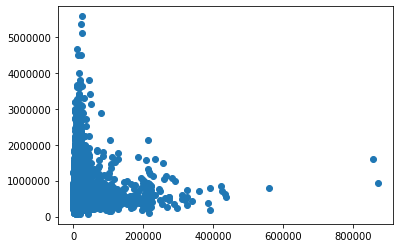

In [49]:
# print(df.head())
df.describe()
# print(df[df['bedrooms'] == 0]) # 9 houses

# plt.scatter(df['bedrooms'], df['price'])
# plt.scatter(df['bathrooms'], df['price'])
# plt.scatter(df['sqft_living'], df['price']) # linear
# plt.scatter(df['floors'], df['price'])
# plt.scatter(df['waterfront'], df['price'])
# plt.scatter(df['view'], df['price'])
# plt.scatter(df['condition'], df['price']) # normal ish
# plt.scatter(df['grade'], df['price']) # linear ish
# plt.scatter(df['sqft_above'], df['price'])
# plt.scatter(df['yr_built'], df['price'])
# plt.scatter(df['yr_renovated'], df['price'])
# plt.scatter(df['sqft_living15'], df['price']) # linear ish
# plt.scatter(df['sqft_lot15'], df['price'])

In [68]:
features = pd.get_dummies(df)
features.iloc[:,5:].head(5)

##
labels = np.array(features['price'])
features = features.drop('price', axis=1)
feature_list = list(features.columns)

features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (12967, 388)
Training Labels Shape: (12967,)
Testing Features Shape: (4323, 388)
Testing Labels Shape: (4323,)


In [69]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('bedrooms')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  537070.55


In [83]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [84]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 71543.28


In [85]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.63 %.


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    df[[
        'bedrooms',
        'bathrooms',
        'sqft_living',
        'sqft_lot',
        'floors',
        'waterfront',
        'view',
        'condition',
        'grade',
        'sqft_above',
        'sqft_basement',
        'yr_built',
        'yr_renovated',
        'sqft_living15',
        'sqft_lot15',
    ]], 
    df['price'], 
    random_state=1
)

In [5]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
clf = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'max_depth' : [3, 5, 7, 9, None],
        'min_samples_leaf' : [1, 2, 3, 5],
        'max_features' : [4, 8, None],
    },
    cv=5
)
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9, None],
                    

In [7]:
def rmse(predictions, actual):
    return np.sqrt(np.mean((predictions - actual)**2))

print('Linear Regression:', rmse(regr.predict(x_test), y_test))
print('Decision Tree', rmse(clf.predict(x_test), y_test))

Linear Regression: 205926.84306324035
Decision Tree 284119.79825440055


# Submission File Generation

In [8]:
dfTest = pd.read_csv('data/val_data.csv').rename({'Unnamed: 0': 'Unique_idx'}, axis='columns')

In [9]:
dfTest['price'] = regr.predict(dfTest[[
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'sqft_living15',
    'sqft_lot15',
]])

In [10]:
dfTest[['Unique_idx', 'price']].to_csv('submission.csv', index=None, header=True)